# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [46]:
import numpy as np;
def max_element(arr):
    zero = arr==0;
    print (arr[1:][zero[:-1]].max());
# вызов функции
newArray=np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]);
max_element(newArray);    
#заметка. python блоки кода разграничиваются отступами.

5


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [47]:
def nearest_value(X, v):
    deviations = np.abs(X - v)
    return X[np.where(deviations == np.min(deviations))][0]
# вызов ф-и
import numpy as np
x= np.arange(0,10).reshape((2, 5)) 
v=3.6
nearest_value(x, v )

4

Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [48]:

def scale(X):
    means,stds=np.mean(X, axis=0),np.std(X,axis=0)
    print((X-means)/stds)
    # Выборочное среднее -это просумировать всё члены и поделить на их кол-во
    # стандартное отклонение-это из каждого члена вычитаем среденее число, делим на n-1 и 
    # потом сумируем с каждым результатом
    # (a-b среднее)^2/n-1
    #https://pythonworld.ru/numpy
    
import numpy as np    
X=np.random.randint(0,50,size=(4,4));
scale(X)

[[-0.73379939 -1.         -1.6336601  -0.38853614]
 [-0.03494283 -1.          0.98019606  1.70152033]
 [ 1.64231291  1.          0.60678804 -0.44212733]
 [-0.8735707   1.          0.046676   -0.87085686]]


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [49]:
import numpy as np
def get_stats(X):
    print('определитель:');
    print(np.linalg.det(X)); 
    print('след:');
    print (np.trace(X));
    #Функция trace() вычисляет cумму диагональных элементов (след) матрицы
    print('максимальное число в матрице:');
    print (np.max(X));
    print('минимальное число в матрице:');
    print (np.min(X));
    from numpy import linalg as LA
    print('нормa Фробениуса:');
    print (LA.linalg.norm(X, ord=None));
    #Норма Фробениуса или, как её ещё называют Евклидова норма, — это квадратный корень сумм квадратов модулей элементов матрицы размера m × n:
    #https://yu-xuan.livejournal.com/134964.html 
    print ('собственные числа:');
    print(LA.eig(X));
    print('обратную матрицу');
    print(LA.inv(X));
mu, sigma = 0.5, 0.1
newArray=np.random.normal(mu, sigma, (3, 3))
print(newArray)
get_stats(newArray);

[[0.5008581  0.43240862 0.51209593]
 [0.54147686 0.34315537 0.6439243 ]
 [0.49308311 0.39718934 0.51111549]]
определитель:
0.0008553283303329431
след:
1.3551289655197554
максимальное число в матрице:
0.6439242976434856
минимальное число в матрице:
0.34315537020185305
нормa Фробениуса:
1.4791210135378494
собственные числа:
(array([ 1.45140388, -0.0065694 , -0.08970552]), array([[-0.57323905, -0.79724215,  0.47488546],
       [-0.60264723,  0.3968869 , -0.86148863],
       [-0.55516962,  0.45484695,  0.17978083]]))
обратную матрицу
[[-93.96139172 -20.59057165 120.08248027]
 [ 47.64366838   4.08086699 -52.87630422]
 [ 53.62235768  16.69287333 -72.79908087]]


Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [246]:
vals = np.empty(100)
for exp_num in range(100):
    x1 = np.random.normal(0, 1, (10, 10))
    x2 = np.random.normal(0, 1, (10, 10))
    vals[exp_num] = np.max(x1.dot(x2))
    
print('Среднее значение: ',np.mean(vals))
print('95-процентная квантиль: ',np.percentile(vals, 95))

Среднее значение:  8.381763636906072
95-процентная квантиль:  12.304089416190976


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [1]:
import pandas as pd
%matplotlib inline

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [4]:
# Your code here
#reason for cancellation 
import pandas as pd
df = pd.read_csv('2008.csv');
A=0; B=0;C=0;D=0;
for val in df.CancellationCode: #перебор значений в объекте forech c#
    if val=='A':
        A=A+1
    if val=='B':
        B=B+1
    if val=='C':
        C=C+1
    if val=='D':
        D=D+1

if A>B and A>C and A>D:
    print ('A-carrier =',A)
        
else:
    if B>A and B>C and B>D:
        print ('B-weather =',B)
    else:
        if C>A and C>B and C>D:
            print ('C-NAS =',C) 
        else:
            if D>A and D>B and D>C:
                print ('D-security =',D) 
            else:
                 print(' A-carrier =',A,'\n', 'B-weather =',B,'\n', 
                       'C-NAS =',C,'\n','D-security =',D)


A-carrier = 563


 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [53]:
# Your code here
import pandas as pd
df = pd.read_csv('2008.csv');
################################# считаем по всем самолётам
t=df.agg({'Distance':['min', 'max', 'mean', 'median']})
print('all plane',t); 
##################### считаем по опредёлному:
s=df[(df.TailNum== 'N795AS')]
t=s.agg({'Distance':['min', 'max', 'mean', 'median']})
print('plane: N795AS=',t); 




all plane            Distance
min       31.000000
max     4962.000000
mean     724.508257
median   575.000000
plane: N795AS=         Distance
min         31.0
max       1721.0
mean       758.0
median     812.5


 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [54]:
# Your code here
import pandas as pd
df = pd.read_csv('2008.csv');
t=df[(df.Distance== 31)][['Distance',"Month", 'DayofMonth', 'FlightNum']].sort_values('FlightNum') ;
# условие where без null https://tproger.ru/translations/rewrite-sql-queries-in-pandas/
print (t);
t=df[(df.FlightNum==64) & (df.Distance!= 31)][['Distance','Month','DayofMonth', 'FlightNum']].sort_values('Distance')
print ('FlightNum=64: ','\n',t);

t=df[(df.FlightNum==65) & (df.Distance!= 31)][['Distance','Month','DayofMonth', 'FlightNum']].sort_values('Distance')
print ('FlightNum=65: ','\n',t);


       Distance  Month  DayofMonth  FlightNum
17349        31      8          18         64
27534        31      3          11         64
48112        31      2          28         64
1116         31     12          30         65
6958         31     12          26         65
46082        31      8           9         65
FlightNum=64:  
        Distance  Month  DayofMonth  FlightNum
44810        82      2          12         64
3869         82      7           1         64
32242        82      9          23         64
30053        82      1           4         64
12980        82      8           6         64
55053       123      3          31         64
4466        123      6          29         64
29801       123      4          23         64
8448        123      2          10         64
6778        359      7          12         64
10833       372      3          31         64
64319       414      5           3         64
501         533      3          20         64
25671       533  

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [55]:
import numpy as np
IATA_code = df.groupby('Origin').size().idxmax()
airports = pd.read_csv('airports.csv') # http://stat-computing.org/dataexpo/2009/supplemental-data.html
print(IATA_code, "находится в городе ", airports[airports['iata'] == IATA_code]['city'].values)

ATL находится в городе  ['Atlanta']


Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [56]:
# Your code here
import pandas as pd;
%matplotlib inline
df = pd.read_csv('2008.csv');
t=df[['Origin','AirTime']].groupby('Origin').mean().sort_values(by=['AirTime'], ascending=False)
print(t,'\n','max','\n',t.head(1));   


           AirTime
Origin            
SJU     205.200000
BQN     193.954545
PSE     191.875000
STT     185.029412
ANC     165.415094
...            ...
PSG      20.250000
OXR      19.666667
WRG      18.000000
GST      13.000000
DLG            NaN

[297 rows x 1 columns] 
 max 
         AirTime
Origin         
SJU       205.2


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [57]:
# Your code here
import pandas as pd;
%matplotlib inline
df = pd.read_csv('2008.csv');
print(df[['Origin','DepDelay']].groupby(['Origin']).filter(lambda x: x['Origin'].count()>1000).sort_values(by=['DepDelay'], ascending=False).head(1))


     Origin  DepDelay
3635    MCO     750.0


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [2]:
# Your code here
import pandas as pd;
import numpy as np
df = pd.read_csv('2008.csv')
sIsnullSum=df.isnull().sum()
print('Имеются ли в данных пропущенные значения? ',sIsnullSum.count()>0) #true or false
##################################################################
# Сколько всего пропущенных элементов в таблице "объект-признак"?
print('Сколько всего пропущенных элементов в таблице:',df.isnull().sum().sum())
##############################################
#cколько объектов имеют хотя бы один пропуск?
dfNew = df.dropna(axis = 0, how ='any') 
print("cколько объектов имеют хотя бы один пропуск? ", (len(df)-len(dfNew)))
#############################################################
#признак-это как я понял,это название столбца в бд
#Сколько признаков имеют хотя бы одно пропущенное значение?
count=0;
for countStep in sIsnullSum:
    if countStep > 0:
        count=count+1;
print('признаков имеют хотя бы одно пропущенное значение:',count);



Имеются ли в данных пропущенные значения?  True
Сколько всего пропущенных элементов в таблице: 355215
cколько объектов имеют хотя бы один пропуск?  70000
признаков имеют хотя бы одно пропущенное значение: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

__Для каждого авиарейса известны следующие признаки:__
 
 1 Year: 1987 -2008 (соответственно год)
 
 2 Month: 1-12  (соответственно месяц)
 
 3 DayofMonth: 1-31  (соответственно день)
 
 4 DayOfWeek: 1 (Monday) - 7 (Sunday) (соответственно день недели)
 
 5 DepTime:  фактическое время отправления (местное время, ччмм) 
 
 6 CRSDepTime:  запланированное время вылета (местное, ччмм) 
 
 7 ArrTime: фактическое время прибытия (местное, ччмм)
 
 8 CRSArrTime: запланированное время прибытия (местное, ччмм)
 
 9 UniqueCarrier: уникальный код оператора
 
 10 FlightNum: номер рейса
 
 11 TailNum: номер хвоста самолета
 
 12 ActualElapsedTime: фактическое затраченное время в минутах
 
 13 CRSElapsedTime: in minutes
 
 14 AirTime:  время полёта (в минутах)
 
 15 ArrDelay: задержка прибытия (в минутах)
 
 16 DepDelay: задержка вылета (в минутах)
 
 17 Origin:  код аэропорта вылета IATA
 
 18 Dest: код аэропорта назначения IATA
 
 19 Distance: расстояние (в милях)
 
 20 TaxiIn: такси вовремя (в минутах)
 
 21 TaxiOut:  время выхода на такси (в минутах)
 
 22 Cancelled: отменен ли рейс
 
 23 CancellationCode: причина отмены (A = перевозчик, B = погода, C = NAS, D = безопасность)
 
 24 Diverted:  переадресовано (1 = да, 0 = нет)
 
 25 CarrierDelay: задержка из-за перевозчика (в минутах)
 
 26 WeatherDelay: задержка из-за погоды (в минутах)
 
 27 NASDelay: NAS задержка (в минутах)
 
 28 SecurityDelay задержка из-за безопасности (в минутах)
 
 29 LateAircraftDelay: задержка вылета (в минутах)


In [5]:
#? Имеются ли пропущенные значения в целевой переменной?
#целевая функция будет  DepDelay, да имеются пропущенные значений - 1399 print((df.DepDelay.isnull()).sum());
#? Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.
# можно исключить: год, так как в нашей выборке он равен 2008, так же CancellationCode так как он перекрывает большую часть объектов 

import pandas as pd;
%matplotlib inline
df = pd.read_csv('2008.csv')
df = df[(~df['DepDelay'].isnull())]
df = df[(df['DepDelay'] != 0)]
df = df.reset_index() #Reset the index, or a level of it. сброс индексов
df = df.drop('index', 1)# новая итерация с 0 по 63 404, чтоб было красиво
df = df.drop('Cancelled', 1)#Отменен ли рейс
df = df.drop('CancellationCode', 1)#причина отмены
myDepdelayVector = df['DepDelay']
df = df.drop('DepDelay',1)# целевая ф-я, согласно заданию надо: исключить её из матрицы "объект-признак".
print(myDepdelayVector);
df.shape

0        16.0
1        16.0
2        -2.0
3        -3.0
4        -5.0
         ... 
63399    -5.0
63400   -11.0
63401    24.0
63402     6.0
63403    -1.0
Name: DepDelay, Length: 63404, dtype: float64


(63404, 26)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [6]:
import math;
import pandas as pd;
import numpy as np


for collum in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    df[collum+'_Hour'] = df[collum]//100
    df[collum+'_Minute'] = df[collum]%100
    df.drop([collum], axis=1, inplace=True)
print(df)

       Year  Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum TailNum  \
0      2008      6          18          3            WN        242  N699SW   
1      2008      6           4          3            XE       2380  N15980   
2      2008      8           3          7            WN       1769  N464WN   
3      2008      1          23          3            OO       3802  N465SW   
4      2008      5           4          7            WN        399  N489WN   
...     ...    ...         ...        ...           ...        ...     ...   
63399  2008      1          26          6            OH       5218  N655CA   
63400  2008      5          12          1            DL        794  N988DL   
63401  2008      5          11          7            OO       6159  N776SK   
63402  2008      2          18          1            NW        641  N318US   
63403  2008     12           6          6            WN        510  N786SW   

       ActualElapsedTime  CRSElapsedTime  AirTime  ...  Securit

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

 коэ-ты взял из сайта:
        
https://ktonanovenkogo.ru/voprosy-i-otvety/korrelyaciya-chto-ehto-takoe-prostymi-slovami.html
    
r=1	Сильная положительная корреляция 

r=-1	Сильная отрицательная корреляция

r<0,5	Слабая положительная корреляция

r=0	Корреляция отсутствует

r<-0,5	Слабая отрицательная корреляция

сайт с туториал, как стороить график кол-ции:     
http://espressocode.top/exploring-correlation-in-python/

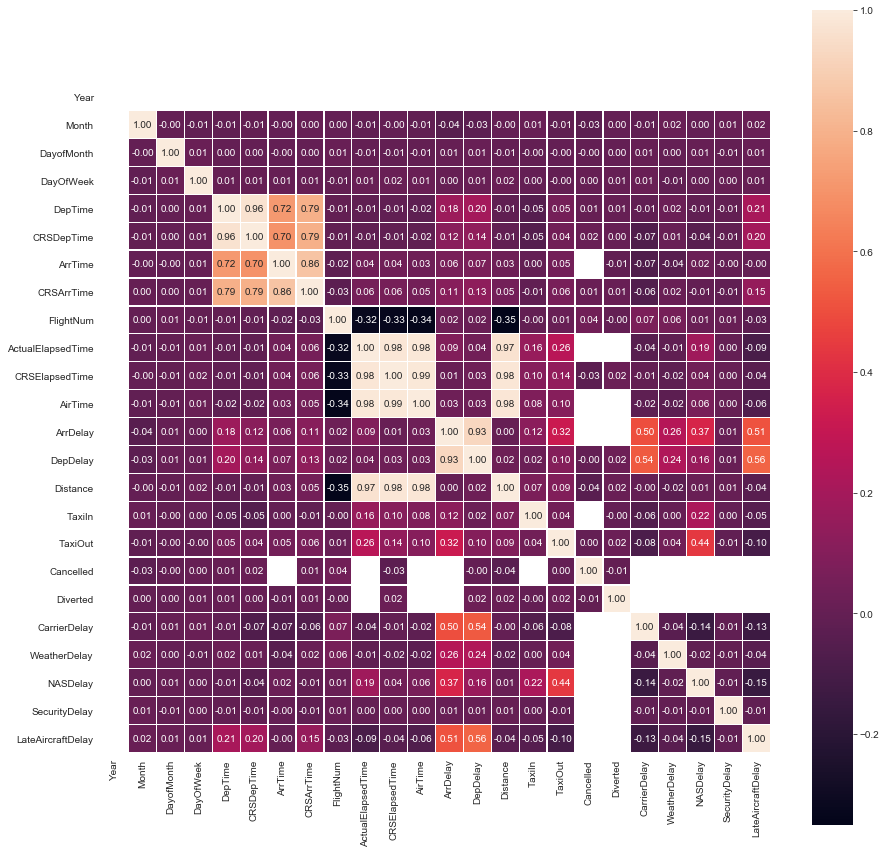

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
df_new = pd.read_csv('2008.csv') #создаю новый data set чтобы посмотерь корреляцию всех данных
corrmat = df_new.corr() 

f, ax = plt.subplots(figsize =(15,15))
sns.heatmap(corrmat, annot=True, fmt=".2f", square=True, linewidths=.4,  ax=ax)
# как видно из графика,что его трудно анализировать, поэтому воспользуемся следующем кодом:
corr_DepDelay = corrmat.loc['DepDelay',:] #цветной график




In [50]:
df_new.corr() #табличка

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,...,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.002155,-0.010587,-0.007985,-0.005269,-0.002270,...,-0.028738,0.001267,-0.008054,0.017517,0.001072,0.008527,0.017205
DayofMonth,NaN,-0.002155,1.000000,0.014100,0.001977,0.002034,-0.001386,...,-0.003188,0.002071,0.007734,0.002301,0.007868,-0.007749,0.008309
DayOfWeek,NaN,-0.010587,0.014100,1.000000,0.005246,0.005131,0.005298,...,0.004459,0.005317,0.014316,-0.012258,0.000360,0.004920,0.006862
DepTime,NaN,-0.007985,0.001977,0.005246,1.000000,0.964394,0.715755,...,0.005210,0.005281,-0.011016,0.023404,-0.008216,-0.007160,0.208907
CRSDepTime,NaN,-0.005269,0.002034,0.005131,0.964394,1.000000,0.696378,...,0.017614,0.002916,-0.069214,0.008835,-0.042982,-0.012129,0.196752
ArrTime,NaN,-0.002270,-0.001386,0.005298,0.715755,0.696378,1.000000,...,NaN,-0.010907,-0.070019,-0.041740,0.021025,-0.002320,-0.000418
CRSArrTime,NaN,0.002922,0.000796,0.005630,0.791983,0.791732,0.861166,...,0.014981,0.011408,-0.063198,0.016987,-0.006913,-0.013098,0.152687
FlightNum,NaN,0.001935,0.008456,-0.006384,-0.005016,-0.009259,-0.018949,...,0.043158,-0.000193,0.072497,0.057978,0.014641,0.008984,-0.025478
ActualElapsedTime,NaN,-0.012743,-0.006916,0.012766,-0.014895,-0.014146,0.036765,...,NaN,NaN,-0.043223,-0.013298,0.185902,0.001802,-0.089252


In [10]:
corr_DepDelay[corr_DepDelay >= 0.5] # сильно коррелирующие признаки-значения. 

ArrDelay             0.930046
DepDelay             1.000000
CarrierDelay         0.535580
LateAircraftDelay    0.558168
Name: DepDelay, dtype: float64

Подведём итог по графику и данным по нему: 
В момент предсказания самолёт ещё не взлетел, следовательно, нам не известна следующая информация: 

1) информация о том, что будет происходить после того, как самолёт взлетит(в момент предсказания) 

2) информация о времени реального отправления(так как во время предсказания нам эта информация не известна), но известно расписание (иначе модель бессмысленна). Исходя из вышеизложенного исключим следующие признаки из матрицы объект-признак:

не влияет:

CRSElapsedTime - не влияет

не можем знать до того, как произошло

LateAircraftDelay
WeatherDelay 
CarrierDelay 
NASDelay
SecurityDelay 
DepTime_Hour 
DepTime_Minute
ArrTime_Hour 
ArrTime_Minute

после вылета:

ActualElapsedTime 
AirTime 
ArrDelay 
ArrTime_Hour  
после вылета 
ArrTime_Minute 
TaxiIn 

не нужен(согласно условию):

TailNum Year

Дополнительные исключения:

Diverted - влияет на задержку при вылете 
TaxiOut - по данным происходит после задержки, так что не влияет на DepDelay

In [11]:
#matrixObjectGhost — матрица "объект-признак";
matrixObjectGhost = df[['DayOfWeek', 'DayofMonth', 'Dest', 'Distance',  'FlightNum', 'Month', 'Origin','UniqueCarrier',
            'CRSDepTime_Hour', 'CRSDepTime_Minute','CRSArrTime_Hour','CRSArrTime_Minute']]
print(matrixObjectGhost)
matrixObjectGhost.head()

       DayOfWeek  DayofMonth Dest  Distance  FlightNum  Month Origin  \
0              3          18  CLE       307        242      6    MDW   
1              3           4  AVL       834       2380      6    IAH   
2              7           3  TPA       997       1769      8    MDW   
3              3          23  FCA       532       3802      1    SLC   
4              7           4  AUS      1090        399      5    LAS   
...          ...         ...  ...       ...        ...    ...    ...   
63399          6          26  BDL       661       5218      1    CVG   
63400          1          12  ATL       606        794      5    ORD   
63401          7          11  GRR       137       6159      5    ORD   
63402          1          18  MSP      1416        641      2    RSW   
63403          6           6  BUR       223        510     12    LAS   

      UniqueCarrier  CRSDepTime_Hour  CRSDepTime_Minute  CRSArrTime_Hour  \
0                WN               20                 55    

,DayOfWeek,DayofMonth,Dest,Distance,FlightNum,Month,Origin,UniqueCarrier,CRSDepTime_Hour,CRSDepTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,3,18,CLE,307,242,6,MDW,WN,20,55,23,0
1,3,4,AVL,834,2380,6,IAH,XE,14,10,17,28
2,7,3,TPA,997,1769,8,MDW,WN,11,45,15,20
3,3,23,FCA,532,3802,1,SLC,OO,11,44,13,35
4,7,4,AUS,1090,399,5,LAS,WN,8,20,13,0


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

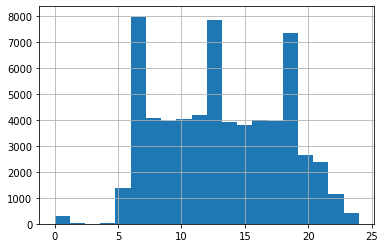

In [12]:
df['DepTime_Hour'].hist(bins=20)

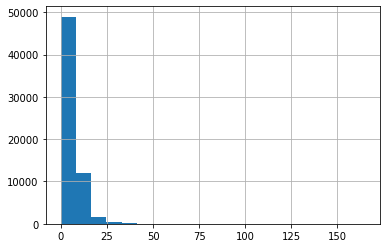

In [13]:
df['TaxiIn'].hist(bins=20)

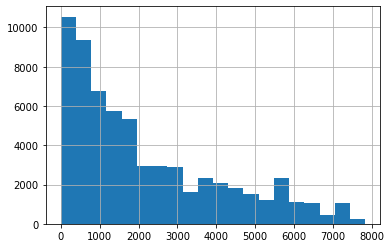

In [14]:
df['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

__Проблема трёх  графиков в том__, что они имеют разную размерность, что не позволяет их правильно сравнивать друг с другом. Например, время нельзя сравнивать с номером рейса.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [15]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 15)

In [16]:
'''
как я понял StandardScaler заключается в том, что он преобразует данные так, что их распределение 
будет иметь среднее значение 0 и стандартное отклонение 1. Учитывая распределение данных,
каждое значение в наборе данных будет вычитаться из среднего значения выборки, 
а затем делиться на стандартное отклонение всего набора данных.

т.е. мы убираем различия между различными данными  
https://issue.life/questions/40758562
'''
def transform_data(data):
    ss = StandardScaler()
    for column in data.columns:
        if data[column].dtype.name == 'object':
            data[column].fillna('nan', inplace = True)
        else:
            data[column].fillna(0, inplace = True)
            data[column]= ss.fit_transform(data[column].values.reshape(-1, 1)).flatten('F')
    data = pd.get_dummies(data)
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [18]:
matrixObjectGhost_trasf = transform_data(matrixObjectGhost)
print(matrixObjectGhost_trasf.shape[1], "признака после преобразования")
matrixObjectGhost_trasf.head()

623 признака после преобразования


,DayOfWeek,DayofMonth,Distance,FlightNum,Month,CRSDepTime_Hour,CRSDepTime_Minute,...,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,-0.462767,0.256485,-0.744130,-0.991600,-0.118281,1.512432,1.586498,...,0,0,0,0,1,0,0
1,-0.462767,-1.332050,0.183961,0.106546,-0.118281,0.214011,-0.936014,...,0,0,0,0,0,1,0
2,1.541454,-1.445517,0.471018,-0.207284,0.467662,-0.435199,1.025940,...,0,0,0,0,1,0,0
3,-0.462767,0.823819,-0.347886,0.836931,-1.583137,-0.435199,0.969884,...,0,1,0,0,0,0,0
4,1.541454,-1.332050,0.634799,-0.910960,-0.411252,-1.084410,-0.375456,...,0,0,0,0,1,0,0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [19]:
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(matrixObjectGhost_trasf, myDepdelayVector, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [20]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

X_train_2, y_train_2 = X_train[:1000], y_train[:1000]
LinReg = LinearRegression()
LinReg.fit(X_train_2, y_train_2) 
#С помощью .fit() вычисляются оптимальные значение весов b₀ и b₁ 
#https://vk.com/@chromakeeeey-lineinaya-regressiya-na-python-obyasnyaem-na-palcah 
#вход и выход (x и y) в качестве аргументов. Другими словами, .fit() совмещает модель. 
#Она возвращает self - переменную model. 
#https://proglib.io/p/linear-regression/
pr_train_LinReg = LinReg.predict(X_train_2) # получаем предсказанный ответ, используя .predict():
pr_test_LinReg = LinReg.predict(X_test)

print('-------Train-------')
print('MSE %0.4f \nR2    %0.4f ' %(mse(y_train_2, pr_train_LinReg), r2_score(y_train_2, pr_train_LinReg)))
print('-------Test-------')
print('MSE %0.4f \nR2    %0.4f ' %(mse(y_test, pr_test_LinReg), r2_score(y_test, pr_test_LinReg)))


-------Train-------
MSE 694.8975 
R2    0.3443 
-------Test-------
MSE 54073602791850020398170112.0000 
R2    -40423755255656113766400.0000 


In [21]:
LinReg.coef_

array([ 8.87129305e-01,  7.67425816e-01,  5.18137271e-01,  8.92278422e-01,
       -4.95773613e-01,  7.90198284e+00, -9.28654912e-01, -1.22303347e+00,
        2.32220092e+00,  4.66030405e+12,  4.66030405e+12,  4.66030405e+12,
       -7.45407385e+13,  2.19991176e+14,  2.78437253e+14,  4.66030405e+12,
       -1.03430268e+14,  5.08569282e+13, -7.06011504e+13,  4.66030405e+12,
       -9.06373747e+13,  5.78211218e+13,  4.66030405e+12,  4.66030405e+12,
        4.66030405e+12,  7.75722666e+13,  4.66030405e+12,  4.66030405e+12,
        4.66030405e+12,  3.51580067e+13, -1.22128377e+14,  4.66030405e+12,
        4.66030405e+12,  7.72228554e+12,  4.66030405e+12, -3.56206456e+13,
       -2.56397821e+13,  4.66030405e+12,  2.66648939e+13,  4.66030405e+12,
        2.34635456e+13, -3.91484350e+12,  4.66030405e+12,  4.66030405e+12,
        4.66030405e+12,  4.66030405e+12, -3.00197751e+13,  4.66030405e+12,
       -1.37234273e+12,  4.66030405e+12, -3.34231961e+13, -6.77411765e+13,
       -5.86436455e+13,  

__Вывод:__

модель работает на тренировочной выборке, но если воспользоваться выборкой из тестового набора, то получаем высокую MSE, а также большую отрицальную R^2.

R^2 может иметь отрицательное значение. Это означает, в свою очередь, то, что модель может быть "сколь угодно плоха" - в сравнении с моделью с одной константой, что дает  𝑅2  = 0. Это может быть вследствие того, что имеются сильные средние отличия между тестовой и тренировочной выборками.

Также важно отметить то, что если модель работает адекватно на тренировочной выборке, но при этом неадекватно показывает себя на тестировочной выборке, данная ситуация сведетельствуют о проблеме переобучения. 



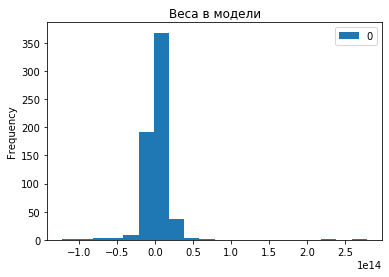

In [22]:
pd.DataFrame(LinReg.coef_).plot.hist(bins=20)
plt.title('Веса в модели');

Также из графика видно, что в модели присутствуют "экстремальные веса" в модели - при таком большом количестве признаков модель теряет обобщающую способность, так как подстраивается под тренировочные данные, минимизируя на них MSE, при этом коэффициенты в основном очень большие.

Для борьбы с подстроением под тренировочные данные нужна регуляризация.
Регуляризация-метод добавления некоторых дополнительных ограничений(штрафов) к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [23]:
# Your code here  https://craftappmobile.com/l1-vs-l2-regularization/
from sklearn.linear_model import LassoCV # лассо-регрессией l1
from sklearn.linear_model import RidgeCV #Риджа  l2
from sklearn.model_selection import KFold

LassReg = LassoCV(alphas=np.linspace(0.01, 100, num=1000), cv=KFold(n_splits=5,random_state=42))
#linspace возвращает одномерный массив из указанного количества элементов, значения которых
#равномерно распределенны внутри заданного интервала.
'''num - Определяет количество элементов последовательности. По умолчанию num = 50.
   0.01-число, которое является началом последовательности.
   100- Число, которое является концом последовательности
   http://zabaykin.ru/?p=667 KFold
   # инициализация KFold с 5тью фолдами
'''
#возвращает одномерный массив из указанного количества элементов, значения которых равномерно 
#распределенны внутри заданного интервала.
#https://pyprog.pro/array_creation/linspace.html  linspace
#http://zabaykin.ru/?p=667   KFold

LassReg.fit(X_train_2, y_train_2)#вычисляются оптимальные значение весов b₀ и b₁ 
pr_train_LassReg = LassReg.predict(X_train_2)
pr_test_LassReg = LassReg.predict(X_test)




In [24]:
LassReg.coef_

array([ 0.        ,  0.14977813,  0.73600924,  0.11622887, -0.6530681 ,
        5.44399428,  0.        ,  0.        ,  1.06151939,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.  

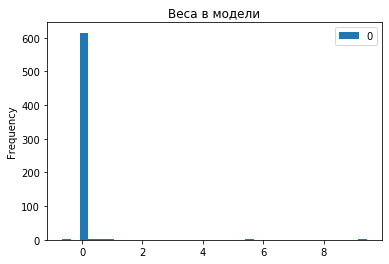

In [25]:
pd.DataFrame(LassReg.coef_).plot.hist(bins=35)
plt.title('Веса в модели');

In [26]:
LassReg.alpha_

0.41036036036036033

In [27]:
print('-------Train-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_train_2, pr_train_LassReg), r2_score(y_train_2, pr_train_LassReg)))
print('-------Test-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_test, pr_test_LassReg), r2_score(y_test, pr_test_LassReg)))

-------Train-------
MSE 1006.7691 
R2     0.0501 
-------Test-------
MSE 1316.3999 
R2     0.0159 


In [28]:
RidgeReg = RidgeCV(alphas=np.linspace(0.01, 150, num=100), cv=KFold(n_splits=5,random_state=42))
RidgeReg.fit(X_train_2, y_train_2)
pr_train_RidgeReg = RidgeReg.predict(X_train_2)
pr_test_RidgeReg = RidgeReg.predict(X_test)


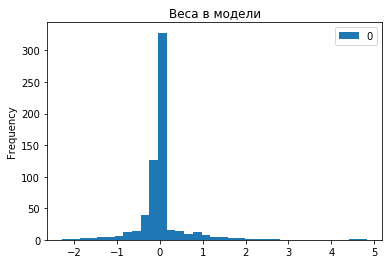

In [29]:
pd.DataFrame(RidgeReg.coef_).plot.hist(bins=35)
plt.title('Веса в модели');

In [30]:
RidgeReg.coef_

array([ 2.12532400e-01,  5.64604054e-01,  1.14281567e+00,  4.79208763e-01,
       -9.14402180e-01,  4.82606226e+00, -1.82435175e-02,  7.46580505e-01,
        1.30860125e+00,  8.79407046e-01, -1.53591809e-01, -1.83568173e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.13300320e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.12459251e-01,
        0.00000000e+00,  0.00000000e+00,  6.95170110e-02, -7.04885037e-02,
        1.49167447e-01,  0.00000000e+00,  1.64111891e+00, -4.03550007e-01,
       -1.54884545e-01,  0.00000000e+00,  0.00000000e+00, -9.05179407e-02,
       -6.75599475e-01,  0.00000000e+00, -1.85222488e-01,  0.00000000e+00,
        0.00000000e+00, -1.24331712e-01,  0.00000000e+00,  1.52102524e-01,
        0.00000000e+00,  0.00000000e+00, -2.91577155e-02, -4.44932423e-01,
        9.80666155e-02,  1.95595504e+00,  0.00000000e+00, -1.83877373e-01,
        0.00000000e+00,  2.61925809e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [31]:

print('-------Train-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_train_2, pr_train_RidgeReg), r2_score(y_train_2, pr_train_RidgeReg)))
print('-------Test-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_test, pr_test_RidgeReg), r2_score(y_test, pr_test_RidgeReg)))
RidgeReg.alpha_

-------Train-------
MSE 971.6110 
R2     0.0832 
-------Test-------
MSE 1307.2449 
R2     0.0227 


116.6688888888889

__Вывод:__

Хоть и тренировочная выборка отличается от тестируемой, значение MSE у тестировочной выборок улучшилось, а вот значения R^2 стали стали не только положительными и их значение приблизилось к 0. Из этого можно сделать вывод о том, что и на тренировочной, и на тестовой Ridge показывает себя немного лучше.

# ## Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [34]:
X_train['AddColum'] = 1
X_test['AddColum'] = 1
X_train.head()

,DayOfWeek,DayofMonth,Distance,FlightNum,Month,CRSDepTime_Hour,CRSDepTime_Minute,...,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,AddColum
43110,1.541454,-0.310849,1.066264,0.136336,0.174690,-0.651603,-0.655735,...,0,0,0,1,0,0,1
35833,1.541454,-1.218584,-0.391913,2.143612,1.053604,-0.651603,1.025940,...,0,0,0,0,0,0,1
41969,0.038288,-0.651249,-0.659598,1.822592,-1.583137,0.646818,-0.375456,...,0,0,0,0,0,0,1
38854,0.038288,0.710352,2.557903,-1.110249,-0.411252,-0.435199,-0.543623,...,0,0,0,0,0,0,1
40678,-0.963823,1.618087,0.442841,-0.590453,1.639547,1.079625,-1.440516,...,0,0,0,0,0,0,1


Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент
w0 линейной регрессии.

Использование методов машинного обучения для создания биржевого робота
Бросалин Д. С. (Российская Федерация)
https://docviewer.yandex.ru/view/565422162/?page=1&*=oOyEVH4LwVtflwzJDKXE6AK0upN7InVybCI6Imh0dHBzOi8vaXBpMS5ydS9pbWFnZXMvUERGLzIwMTYvNTQvaXNwb2x6b3ZhbmllLW1ldG9kb3YtbWFzaGlubm9nby5wZGYiLCJ0aXRsZSI6ImlzcG9sem92YW5pZS1tZXRvZG92LW1hc2hpbm5vZ28ucGRmIiwibm9pZnJhbWUiOnRydWUsInVpZCI6IjU2NTQyMjE2MiIsInRzIjoxNTkzMDAxMjEwOTk3LCJ5dSI6IjU5MDY0NjkxNTE1NjMyOTIzNDgiLCJzZXJwUGFyYW1zIjoibGFuZz1ydSZ0bT0xNTkzMDAxMTk4JnRsZD1ydSZuYW1lPWlzcG9sem92YW5pZS1tZXRvZG92LW1hc2hpbm5vZ28ucGRmJnRleHQ9JUQwJTkyJUQwJUI1JUQwJUJBJUQxJTgyJUQwJUJFJUQxJTgwKyVEMCVCOCVEMCVCNyslRDAlQjUlRDAlQjQlRDAlQjglRDAlQkQlRDAlQjglRDElODYrJUQwJUJEJUQxJTgzJUQwJUI2JUQwJUI1JUQwJUJEKyVEMCVCNCVEMCVCQiVEMSU4RislRDElODIlRDAlQkUlRDAlQjMlRDAlQkUlMkMrJUQxJTg3JUQxJTgyJUQwJUJFJUQwJUIxJUQxJThCKyVEMCVCRCVEMCVCNSslRDAlQkUlRDAlQjElRDElODAlRDAlQjAlRDAlQjElRDAlQjAlRDElODIlRDElOEIlRDAlQjIlRDAlQjAlRDElODIlRDElOEMrJUQwJUJFJUQxJTgyJUQwJUI0JUQwJUI1JUQwJUJCJUQxJThDJUQwJUJEJUQwJUJFKyVEMCVCQSVEMCVCRSVEMSU4RCVEMSU4NCVEMSU4NCVEMCVCOCVEMSU4NiVEMCVCOCVEMCVCNSVEMCVCRCVEMSU4Mit3MCslRDAlQkIlRDAlQjglRDAlQkQlRDAlQjUlRDAlQjklRDAlQkQlRDAlQkUlRDAlQjkrJUQxJTgwJUQwJUI1JUQwJUIzJUQxJTgwJUQwJUI1JUQxJTgxJUQxJTgxJUQwJUI4JUQwJUI4LiZ1cmw9aHR0cHMlM0EvL2lwaTEucnUvaW1hZ2VzL1BERi8yMDE2LzU0L2lzcG9sem92YW5pZS1tZXRvZG92LW1hc2hpbm5vZ28ucGRmJmxyPTIxMyZtaW1lPXBkZiZsMTBuPXJ1JnNpZ249YjhhYzI3YmI5NmEyOTgwMzk0ZDNkYTJjNzI5OTE1MGMma2V5bm89MCJ9&lang=ru


**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [35]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.dot(X,w)#вычисляет скалярное произведение двух массивов

In [36]:

# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    Li = (y-make_pred(X, w))/y
    return np.dot(Li,Li)/y.shape[0]

In [37]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    l1 = (y-make_pred(X, w))/y
    L = np.dot(X.T, l1/y)
    return -2*L/y.shape[0]

In [38]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    Li = (y-make_pred(X, w))/y
    return np.dot(Li,Li)/y.shape[0]+np.dot(w,w)

In [39]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    return get_grad(w, X, y) + 2 * w  

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [40]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    wpr,wtek = w0,w0
    L = [get_reg_func(wpr, X, y)] if is_reg else [get_func(wpr, X, y)]
    
    for i in range(max_iter):
        if is_reg == True:
            mspe_L = get_reg_func(wpr, X, y)
            L.append(mspe_L)
            grad = get_reg_grad(wpr, X, y)
        else:
            mspe = get_func(wpr, X, y)
            L.append(mspe)
            grad = get_grad(wpr, X, y)
        wtek = wpr - (step_size * grad)
        if np.linalg.norm(wtek - wpr) < eps:
            break
        wpr = wtek
    return wtek, L

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [42]:
alp=[0.001, 1, 10]
wz1,mspe1,wr1,msper1 = {},{},{},{}
for a in alp:
    #Нулевые значения весов:
    wz1[a], mspe1[a] = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=np.zeros((X_train.shape[1])), step_size=a, max_iter=1000, eps=0.0001, is_reg=False)
    #Случайные веса:
    wr1[a], msper1[a] = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=np.random.rand(X_train.shape[1]), step_size=a, max_iter=1000, eps=0.0001, is_reg=False)   


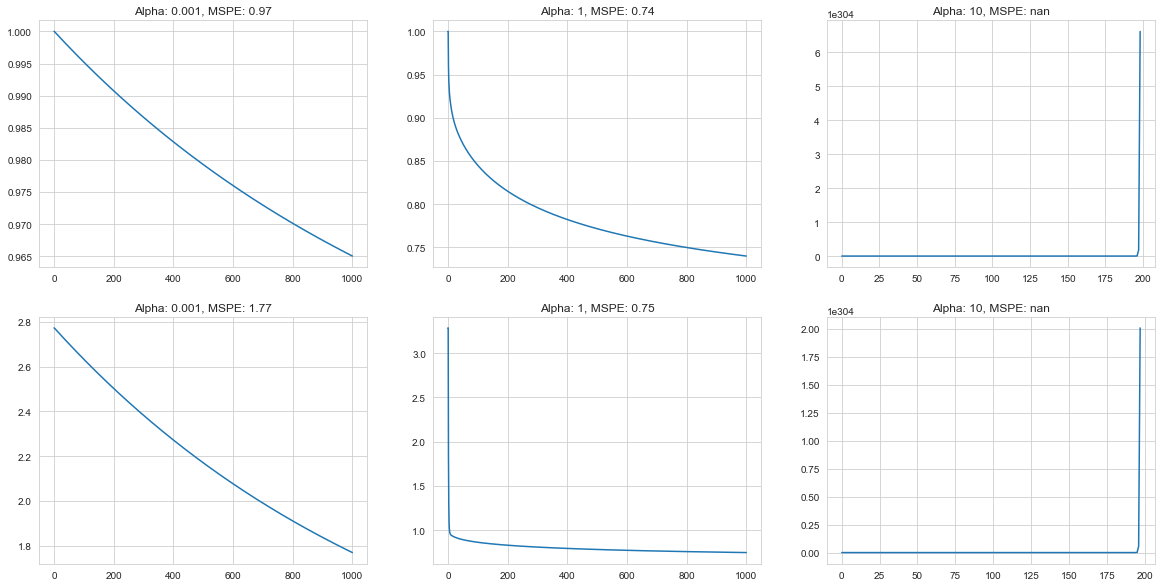

In [43]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.title('Alpha: 0.001, MSPE: {}'.format(round(mspe1[0.001][-1], 2)))
plt.plot(mspe1[0.001])
plt.subplot(2, 3, 2)
plt.title('Alpha: 1, MSPE: {}'.format(round(mspe1[1][-1], 2)))
plt.plot(mspe1[1])
plt.subplot(2, 3, 3)
plt.title('Alpha: 10, MSPE: {}'.format(round(mspe1[10][-1], 2)))
plt.plot(mspe1[10]);
plt.subplot(2, 3, 4)
plt.title('Alpha: 0.001, MSPE: {}'.format(round(msper1[0.001][-1], 2)))
plt.plot(msper1[0.001])
plt.subplot(2, 3, 5)
plt.title('Alpha: 1, MSPE: {}'.format(round(msper1[1][-1], 2)))
plt.plot(msper1[1])
plt.subplot(2, 3, 6)
plt.title('Alpha: 10, MSPE: {}'.format(round(msper1[10][-1], 2)))
plt.plot(msper1[10]);

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество?
Если да, то как?

Да, данные параметры влияют на скорость сходимости. 

Согласно условию, нам данны размеры шага из набора __[0.001, 1, 10]__, а так же способы начальной инициализации вектора весов __(нули, случайные веса)__.

------------------------------------------------
При инцилизации вектора весов нулями(__3 верхних графика__):

алгоритм медлено сходится при значении __альфа = 0.001__;

При значении __альфа = 10__, алгоритм расходится(в условиях приближенных вычислений на "компьютере" накапливает погрешности в вычислениях, что приводит к неверному конечному результату).

Следовательно, можно сделать вывод, что значение __альфа = 1__, является оптимальным в данном конкретном случае.

-----------------------------------------------------------
При инициализации вектора весов случайными весами(__3 нижних графика__):

алгоритм медлено сходится при значении __альфа = 0.001__, но стоит отметить, то что алгоритм не успевает сходиться к тому же уровню, что и алгоритм с нулевыми начальными весами.

При при значении __альфа = 1__ алгоритм сходится к тому же значению функционала потерь к 1000 итерации(что и с нулевыми весами), но стоит отметить тут то, что начинает с большего значения.

при значении __альфа = 10__ алгоритм расходится

оптимальным выбором для этого алгоритма будет значение __альфа = 1__, так как при маленьких альфа алгоритм не успевает сходиться к тому же уровню, что и алгоритм с нулевыми начальными весами, а при __альфа = 10__ алгоритм  расходится.




**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [44]:
alp = [0.001,0.01,1, 10]
wz2,mspez2,wr2,msper2 = {},{},{},{}
for a in alp:
    #Нулевые значения весов без регулязацией:
    wz2[a], mspez2[a] = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=np.zeros((X_train.shape[1])), step_size=a, max_iter=1000, eps=0.0001, is_reg=False)
    #Нулевые значения весов c регулязацией:
    wr2[a], msper2[a] = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=np.zeros(X_train.shape[1]), step_size=a, max_iter=1000, eps=0.0001, is_reg=True)

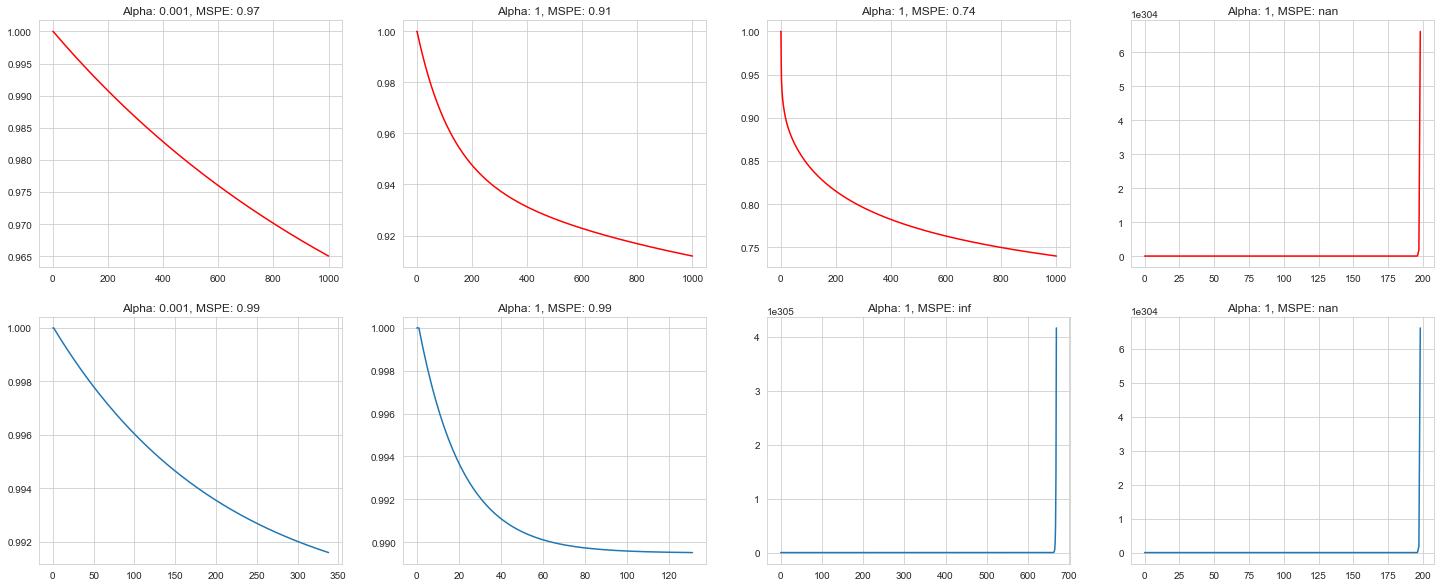

In [45]:
fig = plt.figure(figsize=(25, 10))
plt.subplot(2, 4, 1)
plt.title('Alpha: 0.001, MSPE: {}'.format(round(mspez2[0.001][-1], 2)))
plt.plot(mspez2[0.001],c="r")

plt.subplot(2, 4, 2)
plt.title('Alpha: 1, MSPE: {}'.format(round(mspez2[0.01][-1], 2)))
plt.plot(mspez2[0.01],c="r")

plt.subplot(2, 4, 3)
plt.title('Alpha: 1, MSPE: {}'.format(round(mspez2[1][-1], 2)))
plt.plot(mspez2[1],c="r")

plt.subplot(2, 4, 4)
plt.title('Alpha: 1, MSPE: {}'.format(round(mspez2[10][-1], 2)))
plt.plot(mspez2[10],c="r")

#-----------------------------------------------
plt.subplot(2, 4, 5)
plt.title('Alpha: 0.001, MSPE: {}'.format(round(msper2[0.001][-1], 2)))
plt.plot(msper2[0.001])

plt.subplot(2, 4, 6)
plt.title('Alpha: 1, MSPE: {}'.format(round(msper2[0.01][-1], 2)))
plt.plot(msper2[0.01])

plt.subplot(2, 4, 7)
plt.title('Alpha: 1, MSPE: {}'.format(round(msper2[1][-1], 2)))
plt.plot(msper2[1])

plt.subplot(2, 4, 8)
plt.title('Alpha: 1, MSPE: {}'.format(round(mspez2[10][-1], 2)))
plt.plot(mspez2[10])




In [46]:
alp = [0.001,0.01,1, 10]
wz2Random,mspez2Random,wr2Random,msper2Random = {},{},{},{}
for a in alp:
    #Случайные веса без регулязацией:
    wz2Random[a], mspez2Random[a] = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=np.random.rand((X_train.shape[1])), step_size=a, max_iter=1000, eps=0.0001, is_reg=False)
    #Случайные веса c регулязацией:
    wr2Random[a], msper2Random[a] = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=np.random.rand(X_train.shape[1]), step_size=a, max_iter=1000, eps=0.0001, is_reg=True)

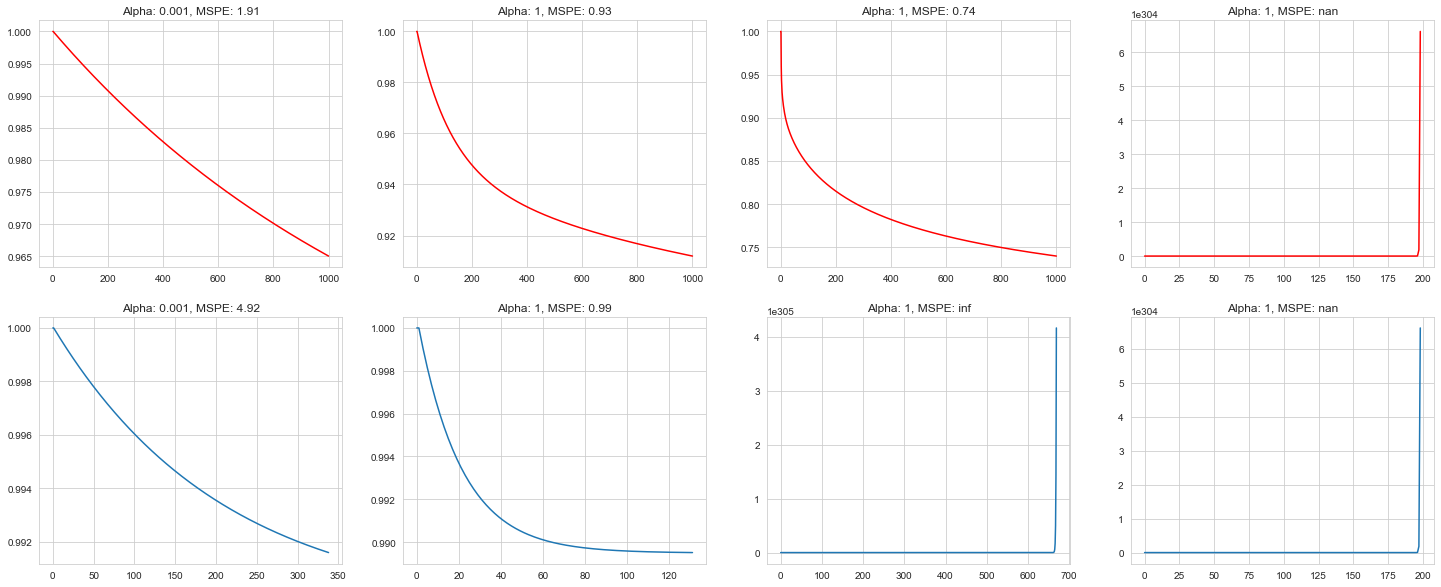

In [47]:
fig = plt.figure(figsize=(25, 10))
plt.subplot(2, 4, 1)
plt.title('Alpha: 0.001, MSPE: {}'.format(round(mspez2Random[0.001][-1], 2)))
plt.plot(mspez2[0.001],c="r")

plt.subplot(2, 4, 2)
plt.title('Alpha: 1, MSPE: {}'.format(round(mspez2Random[0.01][-1], 2)))
plt.plot(mspez2[0.01],c="r")

plt.subplot(2, 4, 3)
plt.title('Alpha: 1, MSPE: {}'.format(round(mspez2Random[1][-1], 2)))
plt.plot(mspez2[1],c="r")

plt.subplot(2, 4, 4)
plt.title('Alpha: 1, MSPE: {}'.format(round(mspez2Random[10][-1], 2)))
plt.plot(mspez2[10],c="r")

#-----------------------------------------------
plt.subplot(2, 4, 5)
plt.title('Alpha: 0.001, MSPE: {}'.format(round(msper2Random[0.001][-1], 2)))
plt.plot(msper2[0.001])

plt.subplot(2, 4, 6)
plt.title('Alpha: 1, MSPE: {}'.format(round(msper2Random[0.01][-1], 2)))
plt.plot(msper2[0.01])

plt.subplot(2, 4, 7)
plt.title('Alpha: 1, MSPE: {}'.format(round(msper2Random[1][-1], 2)))
plt.plot(msper2[1])

plt.subplot(2, 4, 8)
plt.title('Alpha: 1, MSPE: {}'.format(round(msper2Random[10][-1], 2)))
plt.plot(mspez2[10])

__верхнии графики красного цвета__ -это __НЕ__ регуляризованный вариант

__нижние графики синего цвета__ - это регуляризованный вариант на обучающей выборке при помощи метода градиентного спуска

__первая 8-ка графиков__ это нулевые значения весов

__вторая 8-ка графиков__ это случайные веса

Наличие регуляризации приводит к увеличению скорости сходимости.

Во-первых, как видно, из графиков, чтобы сойтись алгоритму с регулязацией(нижние графики) нужно существеенно меньшее значение альфа, для того чтобы алгоритм сошёлся. Причём итераций затраченно на порядок меньше, в отличие от алгоритма без использования регуляриции,  
При значениях альфа 1 и 10 алгоритм расходится(при применении регулязации).


Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [51]:
def SGD(X, y, w0, step_size, max_iter, eps, is_reg):
    wpr = w0
    wtek = wpr
    X0 = X.iloc[0].values.reshape(1, -1)
    y0 = np.asarray(y.iloc[0]).reshape(1, -1)[0,:] 
    myList = [get_reg_func(wpr, X0, y0)] if is_reg else [get_func(wpr, X0, y0)]
    
    for i in range(max_iter):
        ind = np.random.randint(0, high=X.shape[0], size=1)[0]
        X1 = X.iloc[ind].values.reshape(1, -1)
        y1 = np.asarray(y.iloc[ind]).reshape(1, -1)[0,:] 
        if is_reg == True:
            mspe_L = get_reg_func(wpr, X1, y1)
            myList.append(mspe_L)
            grad = get_reg_grad(wpr, X1, y1)
        else:
            mspe = get_func(wpr, X1, y1)
            myList.append(mspe)
            grad = get_grad(wpr, X1, y1)
        wtek = wpr - (step_size * grad)
        if np.linalg.norm(wtek - wpr) < eps:
            break
        wpr = wtek
    return wtek, myList

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

Алгоритм без регуляризации


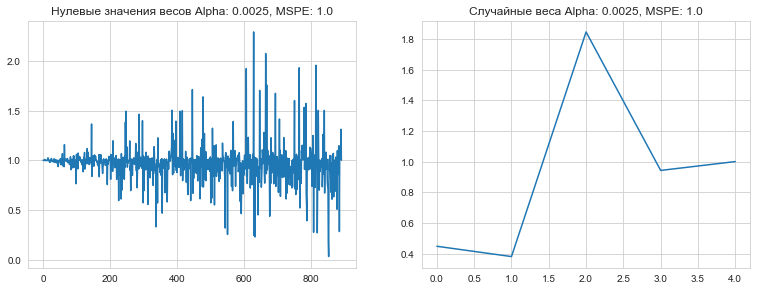

In [247]:
#Нулевые значения весов:
wz3, mspe3 = SGD(X=X_train[:1000], y=y_train[:1000], w0=np.zeros((X_train.shape[1])), step_size=0.0025, max_iter=1000, eps=0.0001, is_reg=False)
#Случайные веса:
wr3, msper3 = SGD(X_train, y_train, w0=np.random.rand(X_train.shape[1]), step_size=0.0025, max_iter=1000, eps=0.0001, is_reg=False)   
print('Алгоритм без регуляризации')
fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.title('Нулевые значения весов Alpha: 0.0025, MSPE: {}'.format(round(mspe3[-1], 2)))
plt.plot(mspe3)
plt.subplot(2, 3, 2)
plt.title('Случайные веса Alpha: 0.0025, MSPE: {}'.format(round(msper3[-1], 2)))
plt.plot(msper3)

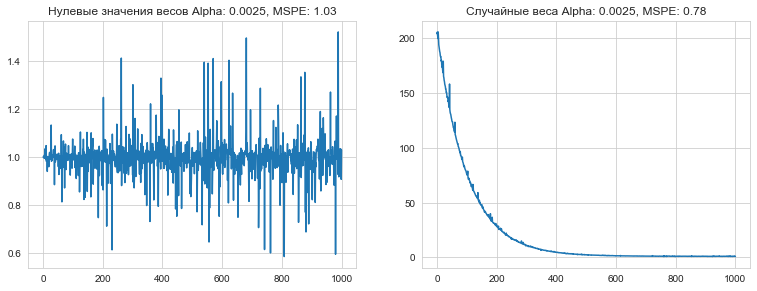

In [291]:
#С регуляризацией
#Нулевые значения весов:
wz4, mspe4 = SGD(X=X_train[:1000], y=y_train[:1000], w0=np.zeros(X_train.shape[1]), step_size=0.0025, max_iter=1000, eps=0.0001, is_reg=True)
#Случайные веса:
wr4, msper4 = SGD(X_train, y_train, w0=np.random.rand(X_train.shape[1]), step_size=0.0025, max_iter=1000, eps=0.0001, is_reg=True)   

fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.title('Нулевые значения весов Alpha: 0.0025, MSPE: {}'.format(round(mspe4[-1], 2)))
plt.plot(mspe4)
plt.subplot(2, 3, 2)
plt.title('Случайные веса Alpha: 0.0025, MSPE: {}'.format(round(msper4[-1], 2)))
plt.plot(msper4)

In [230]:
SGD1_noReg = make_pred(X_test, wz3)
SGD2_noReg = make_pred(X_test, wr3)
SGD3_Reg = make_pred(X_test, wz4)
SGD4_Reg = make_pred(X_test, wr4)

In [231]:
from sklearn.metrics import mean_squared_error
print('No Reg','\n','MSPE: ', get_func(wz3, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD1_noReg),'\n','𝑅2: ', r2_score(y_test, SGD1_noReg),'\n')
print('No Reg','\n','MSPE: ', get_func(wr3, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD2_noReg),'\n','𝑅2: ', r2_score(y_test, SGD2_noReg),'\n')
print('Reg','\n','MSPE: ', get_func(wz4, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD4_Reg),'\n','𝑅2: ',  r2_score(y_test, SGD3_Reg),'\n')
print('Reg','\n','MSPE: ', get_func(wr4, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD4_Reg),'\n','𝑅2: ',  r2_score(y_test, SGD4_Reg),'\n')

No Reg 
 MSPE:  0.9931772722480029 
 MSE:  1454.0748094718442 
 𝑅2:  -0.08702141501035365 

No Reg 
 MSPE:  2.272125971867175 
 MSE:  1417.5657710032158 
 𝑅2:  -0.05972838551949078 

Reg 
 MSPE:  0.9718692066057075 
 MSE:  1455.7398170152624 
 𝑅2:  -0.08897679855205376 

Reg 
 MSPE:  0.9720219850363092 
 MSE:  1455.7398170152624 
 𝑅2:  -0.08826612322210425 



**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [232]:
alp = [0.001,0.01,1, 10]
wz5,mspez5,wr5,msper5,wz6,mspez6,wr6,msper6 = {},{},{},{},{},{},{},{}
for a in alp:
    #Нулевые значения весов без регуляризации:
    wz6[a], mspez6[a] = SGD(X=X_train, y=y_train, w0=np.zeros((X_train.shape[1])), step_size=a, max_iter=1000, eps=0.0001, is_reg=False)
    #Нулевые значения весов c регуляризацией:
    wz5[a], mspez5[a] = SGD(X=X_train, y=y_train, w0=np.zeros((X_train.shape[1])), step_size=a, max_iter=1000, eps=0.0001, is_reg=True)
    #Случайные веса без регуляризации:
    wr6[a], msper6[a] = SGD(X=X_train, y=y_train, w0=np.random.rand(X_train.shape[1]), step_size=a, max_iter=1000, eps=0.0001, is_reg=False)
    #Случайные веса c регуляризацией:
    wr5[a], msper5[a] = SGD(X=X_train, y=y_train, w0=np.random.rand(X_train.shape[1]), step_size=a, max_iter=1000, eps=0.0001, is_reg=True)

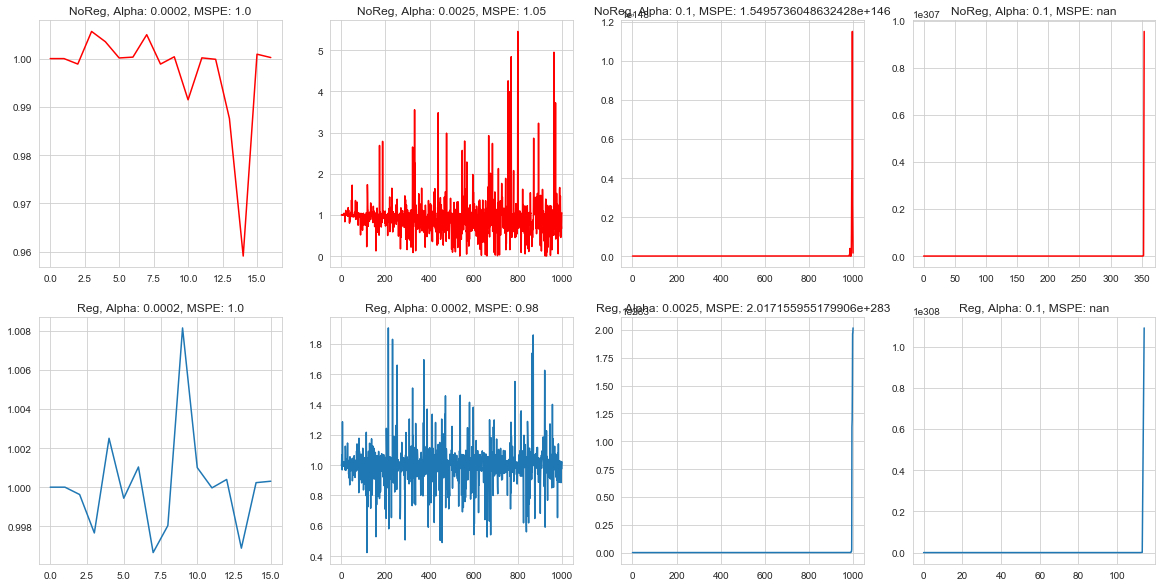

In [233]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
plt.title('NoReg, Alpha: 0.0002, MSPE: {}'.format(round(mspez6[0.001][-1], 2)))
plt.plot(mspez6[0.001],c="r")
plt.subplot(2, 4, 2)
plt.title('NoReg, Alpha: 0.0025, MSPE: {}'.format(round(mspez6[0.01][-1], 2)))
plt.plot(mspez6[0.01],c="r")
plt.subplot(2, 4, 3)
plt.title('NoReg, Alpha: 0.1, MSPE: {}'.format(round(mspez6[1][-1], 2)))
plt.plot(mspez6[1],c="r")
plt.subplot(2, 4, 4)
plt.title('NoReg, Alpha: 0.1, MSPE: {}'.format(round(mspez6[10][-1], 2)))
plt.plot(mspez6[10],c="r")
##############################

plt.subplot(2, 4, 5)
plt.title('Reg, Alpha: 0.0002, MSPE: {}'.format(round(mspez5[0.001][-1], 2)))
plt.plot(mspez5[0.001])

plt.subplot(2, 4, 6)
plt.title('Reg, Alpha: 0.0002, MSPE: {}'.format(round(mspez5[0.01][-1], 2)))
plt.plot(mspez5[0.01])

plt.subplot(2, 4, 7)
plt.title('Reg, Alpha: 0.0025, MSPE: {}'.format(round(mspez5[1][-1], 2)))
plt.plot(mspez5[1])
plt.subplot(2, 4, 8)
plt.title('Reg, Alpha: 0.1, MSPE: {}'.format(round(mspez5[10][-1], 2)))
plt.plot(mspez5[10]);


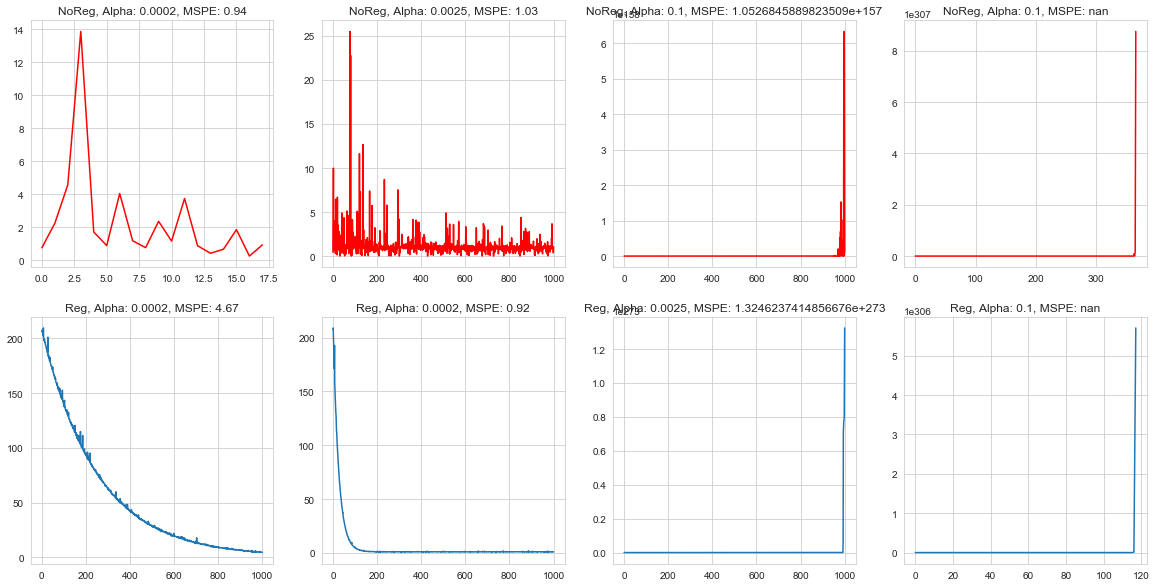

In [234]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
plt.title('NoReg, Alpha: 0.0002, MSPE: {}'.format(round(msper6[0.001][-1], 2)))
plt.plot(msper6[0.001],c="r")
plt.subplot(2, 4, 2)
plt.title('NoReg, Alpha: 0.0025, MSPE: {}'.format(round(msper6[0.01][-1], 2)))
plt.plot(msper6[0.01],c="r")
plt.subplot(2, 4, 3)
plt.title('NoReg, Alpha: 0.1, MSPE: {}'.format(round(msper6[1][-1], 2)))
plt.plot(msper6[1],c="r")
plt.subplot(2, 4, 4)
plt.title('NoReg, Alpha: 0.1, MSPE: {}'.format(round(msper6[10][-1], 2)))
plt.plot(msper6[10],c="r")
##############################

plt.subplot(2, 4, 5)
plt.title('Reg, Alpha: 0.0002, MSPE: {}'.format(round(msper5[0.001][-1], 2)))
plt.plot(msper5[0.001])
plt.subplot(2, 4, 6)
plt.title('Reg, Alpha: 0.0002, MSPE: {}'.format(round(msper5[0.01][-1], 2)))
plt.plot(msper5[0.01])
plt.subplot(2, 4, 7)
plt.title('Reg, Alpha: 0.0025, MSPE: {}'.format(round(msper5[1][-1], 2)))
plt.plot(msper5[1])
plt.subplot(2, 4, 8)
plt.title('Reg, Alpha: 0.1, MSPE: {}'.format(round(msper5[10][-1], 2)))
plt.plot(msper5[10]);


как и в пункте 22, взял такие шаги из набора [0.001,0.1, 1, 10]

__верхние графики красного цвета__ -это __НЕ__ регуляризованный вариант, метода SGD

__нижние графики синего цвета__ - это регуляризованный вариант, метода SGD

__первая 8-ка графиков__ это нулевые значения весов

__вторая 8-ка графиков__ это случайные веса

из графиков видно, что SGD работает плохо, если использованы при инициализации вектора весовыми нулями. 

При инициализации вектора весов случайными весами алгоритм работает лучше. С регуляризацией улучшается сходимость. Алгоритм без регуляризации нестабилен и расходится.

Алгоритм с регуляризацией имеет лучшие результаты сходимости, так как регуляризация позволяет снижать колебания весов за счёт ввода штрафов.


**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [235]:
LinReg_fin = LinearRegression()
LinReg_fin.fit(X_train, y_train)
w_linReg = LinReg_fin.coef_
pred_linReg = LinReg_fin.predict(X_test)

In [236]:
w_linReg.shape

(624,)

In [237]:
print('MSPE %0.4f \nR2  %0.4f' % (get_func(w_linReg, X_test, y_test), r2_score(y_test, pred_linReg)))

MSPE 13286163929909932094128128.0000 
R2  -23132380597932924.0000


In [238]:
print('No Reg','\n','MSPE: ', get_func(wz3, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD1_noReg),'\n','𝑅2: ', r2_score(y_test, SGD1_noReg),'\n')
print('No Reg','\n','MSPE: ', get_func(wr3, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD2_noReg),'\n','𝑅2: ', r2_score(y_test, SGD2_noReg),'\n')
print('Reg','\n','MSPE: ', get_func(wz4, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD4_Reg),'\n','𝑅2: ',  r2_score(y_test, SGD3_Reg),'\n')
print('Reg','\n','MSPE: ', get_func(wr4, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD4_Reg),'\n','𝑅2: ',  r2_score(y_test, SGD4_Reg),'\n')

No Reg 
 MSPE:  0.9931772722480029 
 MSE:  1454.0748094718442 
 𝑅2:  -0.08702141501035365 

No Reg 
 MSPE:  2.272125971867175 
 MSE:  1417.5657710032158 
 𝑅2:  -0.05972838551949078 

Reg 
 MSPE:  0.9718692066057075 
 MSE:  1455.7398170152624 
 𝑅2:  -0.08897679855205376 

Reg 
 MSPE:  0.9720219850363092 
 MSE:  1455.7398170152624 
 𝑅2:  -0.08826612322210425 



Здесь вы можете поделиться своими мыслями по поводу этого задания.

__Вывод__

Если обучать модель с помощью простой линейной регрессии с функционалом 𝑀𝑆𝐸, то можем получить переобучение(присутствуют - экстремальные коэффициенты). Переобучение не позволяет получить правильный результат, и модель не может являться достоверной. Проблему переобучения можно увидеть в пункте 17.
В 17 пункте модель показывает на тестовых данных плохой результат.

Для борьбы с переобучением в 18 пунте использовали L1- и L2-регуляризаторы, что позволило повысить точность "прогнозов".

Дальше использовали функционал MSPE. MSPE показал, что на тестовой выборке для модели (обученной с помощью градиентного спуска с функционалом  𝑀𝑆𝑃𝐸) то, что результат намного точнее, а R^2 хоть и меньше нуля, но очень близок к 0 в отличие от обычной регрессии (с функционалом  𝑀𝑆𝐸 ), у которой данный параметр отрицательно огромен.



А здесь — вставить вашу любимую картинку.